In [1]:
!pip install scipy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

##############
file_name='d.MC_results/S3_MC_results.csv'
df = pd.read_csv(file_name, encoding="UTF-8").copy()
df['Node'] = df['Node'].map(lambda x : 'Node '+str(x))
df.rename(columns={'1':'probability (100s elapsed)', '2':'probability (200s elapsed)', '3':'probability (300s elapsed)', '4': 'probability (400s elapsed)'}, inplace=True)
first_slice=df[['Node', 'probability (100s elapsed)']]
second_slice=df[['Node', 'probability (200s elapsed)']]
third_slice=df[['Node', 'probability (300s elapsed)']]
fourth_slice = df[['Node', 'probability (400s elapsed)']]
df

,Node,probability (100s elapsed),probability (200s elapsed),probability (300s elapsed),probability (400s elapsed)
0,Node 1,0.0,0.00,0.000,0.005
1,Node 2,0.0,0.00,0.000,0.136
2,Node 3,0.0,0.00,0.000,0.003
3,Node 4,0.0,0.00,0.000,0.000
4,Node 5,0.0,0.00,0.000,0.002
...,...,...,...,...,...
60,Node 61,0.0,1.99,5.361,5.126
61,Node 62,0.0,0.00,0.048,0.338
62,Node 63,0.0,0.00,0.000,0.064
63,Node 64,0.0,0.00,0.585,1.081


In [3]:
##############
file_name = "d.smokedetector_t/1381_smokep_avg.csv"
sd=pd.read_csv(file_name, encoding='UTF-8')
sd_df=sd.copy()
sd_df=sd_df.fillna(0)
sd_df

,Unnamed: 0,100s,200s,300s,400s
0,Node 1,0.000000,1.155070e-04,0.003130,0.013085
1,Node 2,0.000000,1.058370e-04,0.002890,0.012830
2,Node 3,0.000000,1.600000e-07,0.000877,0.007171
3,Node 4,0.000000,8.540000e-07,0.000983,0.007326
4,Node 5,0.000000,4.370090e-05,0.002080,0.010011
...,...,...,...,...,...
60,Node 61,0.000016,1.218261e-03,0.005807,0.013736
61,Node 62,0.000000,4.958180e-04,0.004272,0.011493
62,Node 63,0.000000,6.276650e-04,0.004688,0.012775
63,Node 64,0.000006,8.601080e-04,0.004551,0.011397


In [4]:
sd_df = sd_df.rename(columns = {'Unnamed: 0' : 'Node'})
sd_df

,Node,100s,200s,300s,400s
0,Node 1,0.000000,1.155070e-04,0.003130,0.013085
1,Node 2,0.000000,1.058370e-04,0.002890,0.012830
2,Node 3,0.000000,1.600000e-07,0.000877,0.007171
3,Node 4,0.000000,8.540000e-07,0.000983,0.007326
4,Node 5,0.000000,4.370090e-05,0.002080,0.010011
...,...,...,...,...,...
60,Node 61,0.000016,1.218261e-03,0.005807,0.013736
61,Node 62,0.000000,4.958180e-04,0.004272,0.011493
62,Node 63,0.000000,6.276650e-04,0.004688,0.012775
63,Node 64,0.000006,8.601080e-04,0.004551,0.011397


#### Pearson 상관계수

<Axes: >

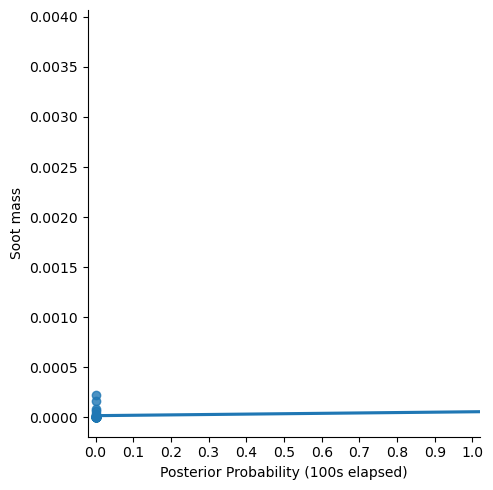

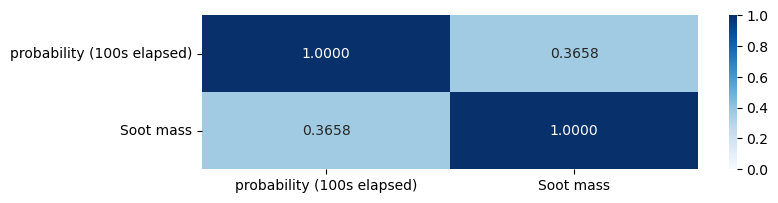

In [5]:
# 100s elapsed
sd_df_1st = sd_df[['Node', '100s']]
sd_df_1st = sd_df_1st.rename(columns = {'100s':'Soot mass'})

df_1st=pd.merge(first_slice, sd_df_1st)
#set_1 = set(df_1st[(df_1st['probability (100s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_1st[(df_1st['Soot mass'] == 0)].index.tolist())
#df_1st_index = list((set_1 | set_2))
#df_1st.drop(df_1st_index, inplace=True)

g1= sns.lmplot(data=df_1st, x='probability (100s elapsed)', y='Soot mass', ci=None)
g1=(g1.set_axis_labels("Posterior Probability (100s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_1st_corr=df_1st[['probability (100s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_1st_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

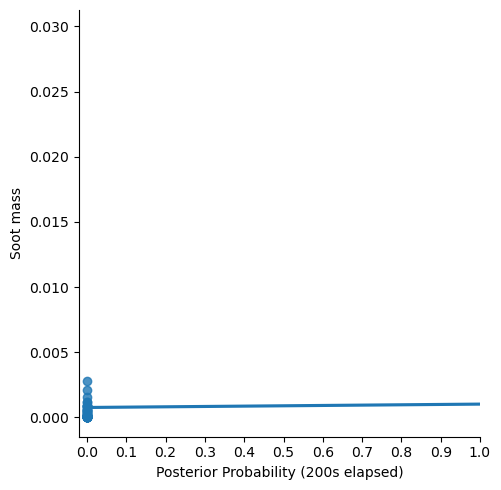

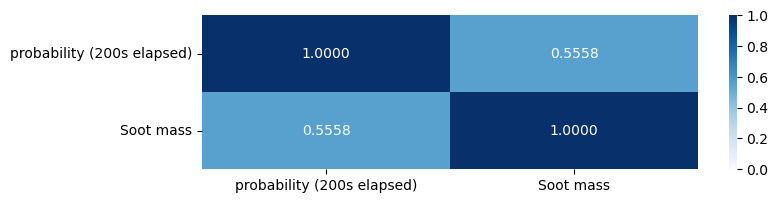

In [6]:
# 200s elapsed
sd_df_2nd = sd_df[['Node', '200s']]
sd_df_2nd = sd_df_2nd.rename(columns = {'200s':'Soot mass'})

df_2nd=pd.merge(second_slice, sd_df_2nd)
#set_1 = set(df_2nd[(df_2nd['probability (200s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_2nd[(df_2nd['Soot mass'] == 0)].index.tolist())
#df_2nd_index = list((set_1 | set_2))
#df_2nd.drop(df_2nd_index, inplace=True)

g2= sns.lmplot(data=df_2nd, x='probability (200s elapsed)', y='Soot mass', ci=None)
g2=(g2.set_axis_labels("Posterior Probability (200s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.0), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_2nd_corr=df_2nd[['probability (200s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_2nd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

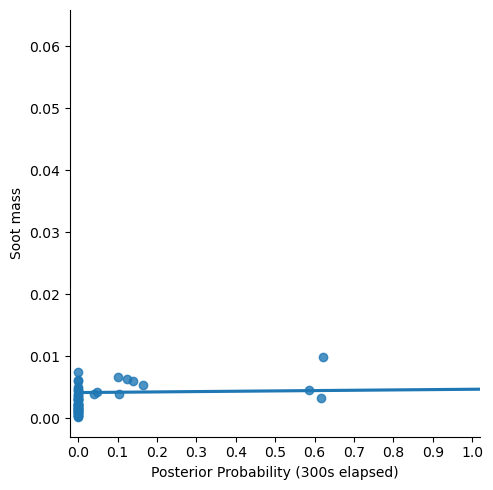

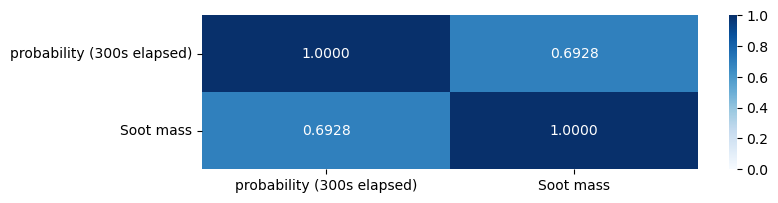

In [7]:
# 300s elapsed
sd_df_3rd = sd_df[['Node', '300s']]
sd_df_3rd = sd_df_3rd.rename(columns = {'300s':'Soot mass'})

df_3rd=pd.merge(third_slice, sd_df_3rd)
#set_1 = set(df_3rd[(df_3rd['probability (300s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_3rd[(df_3rd['Soot mass'] == 0)].index.tolist())
#df_3rd_index = list((set_1 | set_2))
#df_3rd.drop(df_3rd_index, inplace=True)

g3= sns.lmplot(data=df_3rd, x='probability (300s elapsed)', y='Soot mass', ci=None)
g3=(g3.set_axis_labels("Posterior Probability (300s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_3rd_corr=df_3rd[['probability (300s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_3rd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

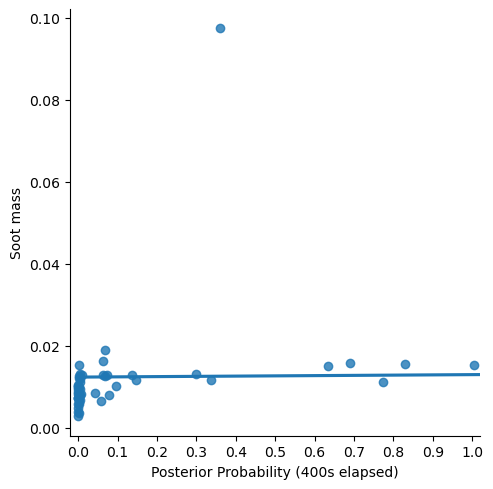

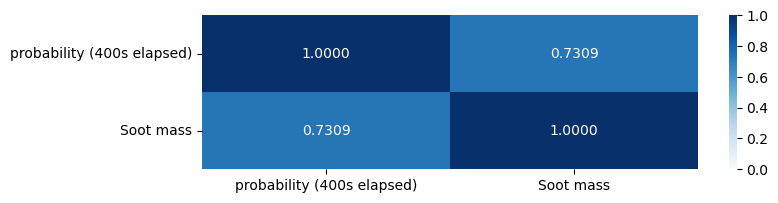

In [8]:
# 400s elapsed
sd_df_4th = sd_df[['Node', '400s']]
sd_df_4th = sd_df_4th.rename(columns = {'400s':'Soot mass'})

df_4th=pd.merge(fourth_slice, sd_df_4th)
#set_1 = set(df_4th[(df_4th['probability (400s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_4th[(df_4th['Soot mass'] == 0)].index.tolist())
#df_4th_index = list((set_1 | set_2))
#df_4th.drop(df_4th_index, inplace=True)

g4= sns.lmplot(data=df_4th, x='probability (400s elapsed)', y='Soot mass', ci=None)
g4=(g4.set_axis_labels("Posterior Probability (400s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_4th_corr=df_4th[['probability (400s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_4th_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

#### pearson & p-value 검정

In [9]:
p_df_1st = df_1st.dropna()
p_df_1st['probability (100s elapsed)'].values
p_df_1st['Soot mass'].values

p_df_2nd = df_2nd.dropna()
p_df_2nd['probability (200s elapsed)'].values
p_df_2nd['Soot mass'].values

p_df_3rd = df_3rd.dropna()
p_df_3rd['probability (300s elapsed)'].values
p_df_3rd['Soot mass'].values

p_df_4th = df_4th.dropna()
p_df_4th['probability (400s elapsed)'].values
p_df_4th['Soot mass'].values

print(stats.pearsonr(p_df_1st['probability (100s elapsed)'].values, p_df_1st['Soot mass'].values))
print(stats.pearsonr(p_df_2nd['probability (200s elapsed)'].values, p_df_2nd['Soot mass'].values))
print(stats.pearsonr(p_df_3rd['probability (300s elapsed)'].values, p_df_3rd['Soot mass'].values))
print(stats.pearsonr(p_df_4th['probability (400s elapsed)'].values, p_df_4th['Soot mass'].values))

PearsonRResult(statistic=0.7021992639096556, pvalue=7.127724583203254e-11)
PearsonRResult(statistic=0.37047809234383805, pvalue=0.0023829124160794266)
PearsonRResult(statistic=0.25606840035204115, pvalue=0.03950412867490782)
PearsonRResult(statistic=0.18563050247561025, pvalue=0.13874975257892747)


#### spearman & pvalue 상관계수

In [10]:
print(stats.spearmanr(p_df_1st['probability (100s elapsed)'].values, p_df_1st['Soot mass'].values))
print(stats.spearmanr(p_df_2nd['probability (200s elapsed)'].values, p_df_2nd['Soot mass'].values))
print(stats.spearmanr(p_df_3rd['probability (300s elapsed)'].values, p_df_3rd['Soot mass'].values))
print(stats.spearmanr(p_df_4th['probability (400s elapsed)'].values, p_df_4th['Soot mass'].values))

SignificanceResult(statistic=0.36580456746050516, pvalue=0.002730180137882753)
SignificanceResult(statistic=0.5558280021232369, pvalue=1.5359963644768253e-06)
SignificanceResult(statistic=0.6927699436884158, pvalue=1.6178174477175401e-10)
SignificanceResult(statistic=0.730874683791034, pvalue=4.786194976753814e-12)


In [11]:
import math
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error

pred1_value = p_df_1st['probability (100s elapsed)'].values
true1_value = p_df_1st['Soot mass'].values
rmse1 = math.sqrt(mean_squared_error(true1_value,pred1_value))
print('rmse1: %f', rmse1)

pred2_value = p_df_2nd['probability (200s elapsed)'].values
true2_value = p_df_2nd['Soot mass'].values
rmse2 = math.sqrt(mean_squared_error(true2_value,pred2_value))
print('rmse2: %f',rmse2)

pred3_value = p_df_3rd['probability (300s elapsed)'].values
true3_value = p_df_3rd['Soot mass'].values
rmse3 = math.sqrt(mean_squared_error(true3_value,pred3_value))
print('rmse3: %f', rmse3)

pred4_value = p_df_4th['probability (400s elapsed)'].values
true4_value = p_df_4th['Soot mass'].values
rmse4 = math.sqrt(mean_squared_error(true4_value,pred4_value))
print('rmse4: %f', rmse4)

rmse1: %f 8.82152024599707
rmse2: %f 5.5852347143917465
rmse3: %f 4.078253535760081
rmse4: %f 3.923964313514704


In [12]:
import numpy as np

def fft_calculation(predict, observe):
    # 예측값과 관측값의 FFT 계산
    predicted_fft = np.fft.fft(predict)
    observed_fft = np.fft.fft(observe)

    # 상관관계 계산
    correlation = np.corrcoef(np.abs(predicted_fft), np.abs(observed_fft))[0, 1]
    
    print(f"FFT 그래프 간의 상관관계: {correlation}")
    
fft_calculation(pred1_value,true1_value)
fft_calculation(pred2_value,true2_value)
fft_calculation(pred3_value,true3_value)
fft_calculation(pred4_value,true4_value)

FFT 그래프 간의 상관관계: 0.8234172383176697
FFT 그래프 간의 상관관계: 0.5124930881136185
FFT 그래프 간의 상관관계: 0.5945855763788014
FFT 그래프 간의 상관관계: 0.6382968238992531


In [13]:
import math
import numpy as np
p_df_1st = df_1st.dropna()
p_df_2nd = df_2nd.dropna()
p_df_3rd = df_3rd.dropna()
p_df_4th = df_4th.dropna()
def Z_normalized(rawdata, adjust=False):
    m = np.mean(rawdata) # 평균, numpy필요
    s = (math.sqrt(np.mean(rawdata-m)**2)) # 표준편차, math 필요
    
    Z = (rawdata - m) / s # Z정규화
    
    if adjust == True:
        Z = (Z-min(Z)) / (max(Z) - min(Z))
    
    return Z

def pearsonr(dataset1, dataset2): #dataset 2에 정규화한쪽 넣기
    pear = stats.pearsonr(dataset1, dataset2) 
    return pear

def spearmanr(dataset1, dataset2): #dataset 2에 정규화한쪽 넣기
    spear = stats.spearmanr(dataset1, dataset2)
    return spear

In [14]:
#### spearman & pvalue 상관계수

Z_1=Z_normalized(p_df_1st['Soot mass'].values, True)
Z_2=Z_normalized(p_df_2nd['Soot mass'].values, True)
Z_3=Z_normalized(p_df_3rd['Soot mass'].values, True)
Z_4=Z_normalized(p_df_4th['Soot mass'].values, True)

print('.............PEARSON COEFFICIENT..............')
print('1:', pearsonr(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('2:', pearsonr(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('3:', pearsonr(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('4:', pearsonr(p_df_4th['probability (400s elapsed)'].values,Z_4))
print('.............SPEARMAN COEFFICIENT..............')
print('1:', spearmanr(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('2:', spearmanr(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('3:', spearmanr(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('4:', spearmanr(p_df_4th['probability (400s elapsed)'].values,Z_4))

.............PEARSON COEFFICIENT..............
1: PearsonRResult(statistic=0.7021992639096555, pvalue=7.127724583203372e-11)
2: PearsonRResult(statistic=0.37047809234383805, pvalue=0.0023829124160794266)
3: PearsonRResult(statistic=0.25606840035204115, pvalue=0.03950412867490782)
4: PearsonRResult(statistic=0.18563050247561028, pvalue=0.13874975257892747)
.............SPEARMAN COEFFICIENT..............
1: SignificanceResult(statistic=0.36580456746050516, pvalue=0.002730180137882753)
2: SignificanceResult(statistic=0.5558280021232369, pvalue=1.5359963644768253e-06)
3: SignificanceResult(statistic=0.6927699436884158, pvalue=1.6178174477175401e-10)
4: SignificanceResult(statistic=0.730874683791034, pvalue=4.786194976753814e-12)


In [15]:
Z_P_1 = Z_normalized(p_df_1st['probability (100s elapsed)'].values, True)
Z_P_2 = Z_normalized(p_df_2nd['probability (200s elapsed)'].values, True)
Z_P_3 = Z_normalized(p_df_3rd['probability (300s elapsed)'].values, True)
Z_P_4 = Z_normalized(p_df_4th['probability (400s elapsed)'].values, True)

print('.............PEARSON COEFFICIENT..............')
print('1:', pearsonr(Z_P_1,Z_1))
print('2:', pearsonr(Z_P_2,Z_2))
print('3:', pearsonr(Z_P_3,Z_3))
print('4:', pearsonr(Z_P_4,Z_4))
print('.............SPEARMAN COEFFICIENT..............')
print('1:', spearmanr(Z_P_1,Z_1))
print('2:', spearmanr(Z_P_2,Z_2))
print('3:', spearmanr(Z_P_3,Z_3))
print('4:', spearmanr(Z_P_4,Z_4))

.............PEARSON COEFFICIENT..............
1: PearsonRResult(statistic=0.7021992639096556, pvalue=7.127724583203254e-11)
2: PearsonRResult(statistic=0.37047809234383805, pvalue=0.0023829124160794266)
3: PearsonRResult(statistic=0.25606840035204104, pvalue=0.03950412867490781)
4: PearsonRResult(statistic=0.1856305024756103, pvalue=0.13874975257892747)
.............SPEARMAN COEFFICIENT..............
1: SignificanceResult(statistic=0.36580456746050516, pvalue=0.002730180137882753)
2: SignificanceResult(statistic=0.5558280021232369, pvalue=1.5359963644768253e-06)
3: SignificanceResult(statistic=0.6927699436884158, pvalue=1.6178174477175401e-10)
4: SignificanceResult(statistic=0.730874683791034, pvalue=4.786194976753814e-12)


FFT 그래프 간의 상관관계: 0.8234172383176698


C:\Users\lablj\AppData\Local\Temp\ipykernel_17380\3105975070.py:24: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 100, 10)


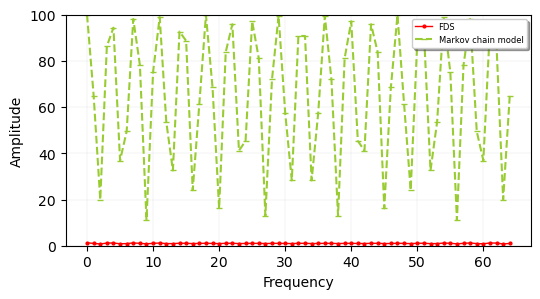

FFT 그래프 간의 상관관계: 0.5124930881136186


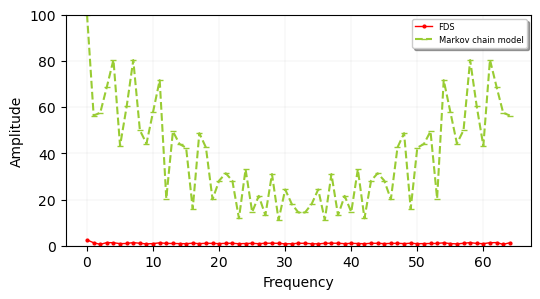

FFT 그래프 간의 상관관계: 0.5951683444867994


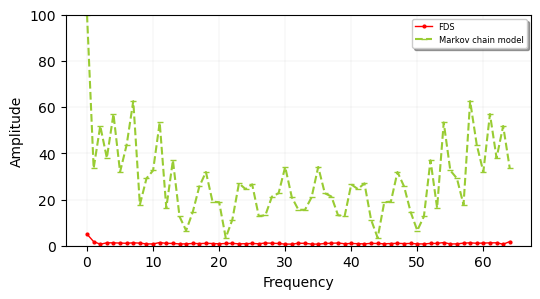

FFT 그래프 간의 상관관계: 0.6435955834645017


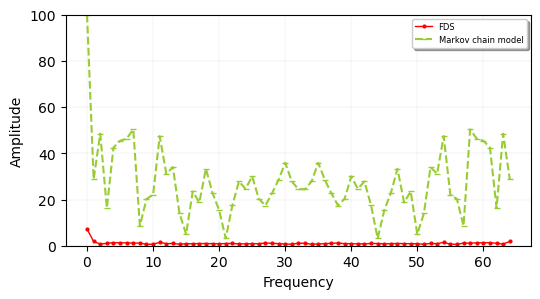

In [24]:
### 기타

import numpy as np

def fft_calculation(predict, observe, plot=False):
    # 예측값과 관측값의 FFT 계산
    predicted_fft = np.fft.fft(predict)
    observed_fft = np.fft.fft(observe)

    # 상관관계 계산
    correlation = np.corrcoef(np.abs(predicted_fft), np.abs(observed_fft))[0, 1]
    
    print(f"FFT 그래프 간의 상관관계: {correlation}")
    
    if plot == True:
        plt.figure(figsize=(6,3))
        plt.plot(np.abs(observed_fft), label='FDS', color = '#ff0000', marker='o', markersize=2, linewidth=1)
        plt.plot(np.abs(predicted_fft), label='Markov chain model', color='#99CC33', linestyle='--', marker='_', markersize=5, linewidth=1.5)
        plt.legend(shadow=True, prop={'size':6}, fancybox=True, loc='upper right')
        plt.grid(True, lw=0.1)
        #plt.title('FFT result comparison')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.ylim(0, 100, 10)
        plt.show()
    
    
fft_calculation(p_df_1st['probability (100s elapsed)'].values,Z_1, plot=True)
fft_calculation(p_df_2nd['probability (200s elapsed)'].values,Z_2, plot=True)
fft_calculation(p_df_3rd['probability (300s elapsed)'].values,Z_3, plot=True)
fft_calculation(p_df_4th['probability (400s elapsed)'].values,Z_4, plot=True)

FFT 그래프 간의 상관관계: 0.8234172383176699


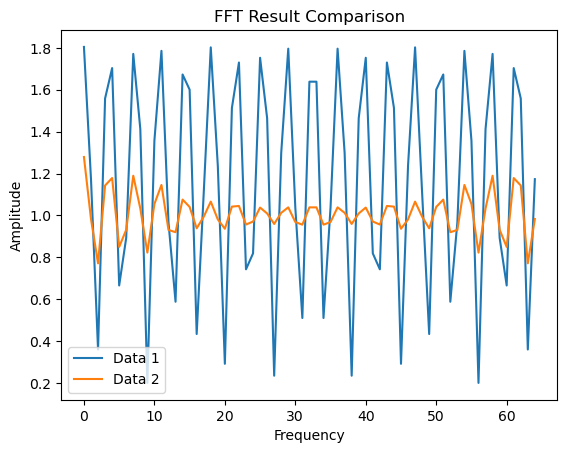

FFT 그래프 간의 상관관계: 0.5124930881136186


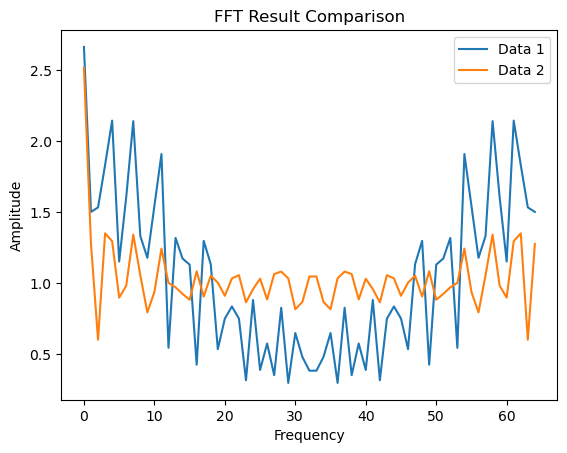

FFT 그래프 간의 상관관계: 0.5951683444867993


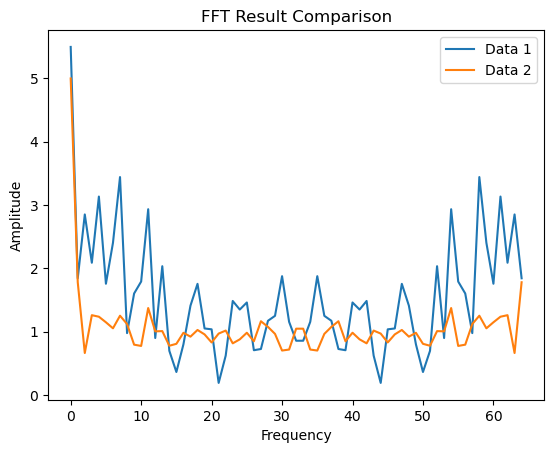

FFT 그래프 간의 상관관계: 0.6435955834645017


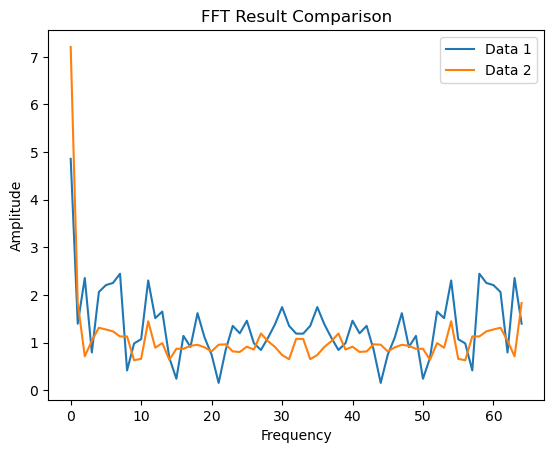

In [17]:
fft_calculation(Z_P_1,Z_1)
fft_calculation(Z_P_2,Z_2)
fft_calculation(Z_P_3,Z_3)
fft_calculation(Z_P_4,Z_4)

In [18]:
# 유클리드 유사도 
def euclidean_distance(model, real):
    euclidean_distance = np.linalg.norm(model - real)
    return euclidean_distance

print('............EUCLIDEAN.............')
print(euclidean_distance(p_df_1st['probability (100s elapsed)'].values,Z_1))
print(euclidean_distance(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print(euclidean_distance(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print(euclidean_distance(p_df_4th['probability (400s elapsed)'].values,Z_4))

# 코사인 유사도
from scipy.spatial.distance import cosine
def cosine_simularity(model, real):
    cosine_simularity = 1-cosine(model, real)
    return cosine_simularity

print('............COSINE.............')
print(cosine_simularity(p_df_1st['probability (100s elapsed)'].values,Z_1))
print(cosine_simularity(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print(cosine_simularity(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print(cosine_simularity(p_df_4th['probability (400s elapsed)'].values,Z_4))

............EUCLIDEAN.............
70.41068607458007
44.606605154447045
32.45404052838154
31.197558979151253
............COSINE.............
0.710252008337948
0.4214746870195394
0.3989561713414742
0.38828004218575785


In [19]:

### CV-RMSE

def cv_rmse(prediction, observation):
    pred = prediction
    obse = observation
    rmse = math.sqrt(mean_squared_error(obse, pred))
    
    m_pred = np.mean(pred)
    m_obse = np.mean(obse)
    cv_rmse = rmse/m_obse
    
    return cv_rmse

print('cv_rmse1:', cv_rmse(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('cv_rmse2:', cv_rmse(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('cv_rmse3:', cv_rmse(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('cv_rmse4:', cv_rmse(p_df_4th['probability (400s elapsed)'].values,Z_4))


cv_rmse1: 443.86047773805524
cv_rmse2: 142.87819309126527
cv_rmse3: 52.3321134339823
cv_rmse4: 34.89199004340892


In [29]:
list(Z_4)

[0.10925705760235656,
 0.10656064393760414,
 0.046740391458943084,
 0.04837348059687232,
 0.07676340297252225,
 0.07646289706594483,
 0.04751322060027822,
 0.021342261830200212,
 0.008805833628522147,
 0.08837538544998774,
 0.06930413770671542,
 0.1060795363913097,
 0.061871045672394674,
 0.05554750415087792,
 0.0,
 0.010880960739412833,
 0.031097667907992434,
 0.05413005876186451,
 0.05709870151807915,
 0.035700456879336866,
 0.046625603445733424,
 0.08010726585185045,
 0.07411786643343317,
 0.2607838840546987,
 0.10048892991757866,
 0.08872774099325301,
 0.1095927958920289,
 0.03866569584696568,
 0.08730181784509108,
 0.03218395215161193,
 0.060463674229102676,
 0.05686423122422121,
 0.04307416231652974,
 0.07697424759094751,
 0.12462631528152031,
 1.0,
 0.11087776836626713,
 0.14287975524857333,
 0.131430065833711,
 0.09356215672078587,
 0.09792506316300545,
 0.10615910259219644,
 0.10383321562778706,
 0.09621219640874937,
 0.07840558297437636,
 0.17124466717765782,
 0.1383092494149